In [1]:
#importing necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\Prakul Mehra\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
pointer_size=10
img=cv.imread(r"C:\Users\Prakul Mehra\Pictures\Camera Roll\WIN_20200405_10_53_39_Pro (2).jpg")

In [3]:
copy=np.copy(img)
marker=np.zeros(copy.shape[:2],dtype=np.int32)
segment=np.zeros(img.shape,dtype=np.uint8)
updated=False
current_marker = 1

In [4]:
# function to get the coordinates where the mouse is clicked. 

def callback(event,x,y,flags,param):
    global updated
    if event == cv.EVENT_LBUTTONDOWN:
        
        cv.circle(marker, (x, y),pointer_size, (current_marker), -1)
        
        cv.circle(copy, (x, y), pointer_size, colors[current_marker], -1)
        updated = True
colors=[(255,0,0),(0,0,255),(0,255,0)]
cv.namedWindow('input')
cv.setMouseCallback('input',callback)

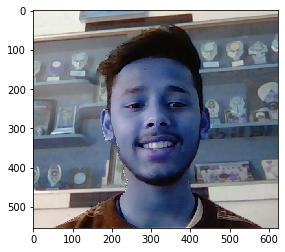

In [5]:
lg= np.array([25, 52, 72])
hg = np.array([102, 255, 255])

while True:
    cv.imshow("input",copy)
    cv.imshow("segment",segment)
    
    k=cv.waitKey(1)
    
    if k==27:
        break
    elif k==ord("c"):
        copy=np.copy(img)
        marker=np.zeros(copy.shape[:2],dtype=np.int32)
        segment=np.zeros(img.shape,dtype=np.uint8)
            
        
    elif k==45:
        pointer_size-=1
        print(pointer_size)
        
        
    elif k==61:
        pointer_size+=1
        print(pointer_size)
        
        
    elif k >= 0 and chr(k).isdigit() and k!=7:
        current_marker=int(chr(k))
        
    if updated==True:
        marker_copy=marker.copy()
        segment =np.zeros(img.shape,dtype=np.uint8)
        cv.watershed(img, marker_copy)
        for color_ind in range(len(colors)):
            segment[marker_copy == (color_ind)] = colors[color_ind]
        
        updated = False
        
cv.destroyAllWindows()    
hsv=cv.cvtColor(segment,cv.COLOR_BGR2HSV)
mask=cv.inRange(hsv,lg,hg)
fg=cv.bitwise_and(img,img,mask=mask)
bg=cv.bitwise_and(img,img,mask=cv.bitwise_not(mask))
bg=cv.blur(bg,(3,3))
final=cv.add(fg,bg)   
plt.imshow(final)
plt.show()